Import the necessary packages and open the ship and grid data. Then flatten the data and bin it on the croco grid.

In [ ]:
import xarray as xr
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import cmasher as cmr
from scipy.ndimage import gaussian_filter
import matplotlib.colors as mcolors
import cmocean

for year in range(2011, 2024):

    month = 12

    ship_data = xr.open_dataset(f'/home/ocean_personal_data/albinski/GMTDS_2011_01-2023_10_ShipTypeAgg_All Others_netcdf/All Others_{year}_{month}.nc')
    grid = xr.open_dataset('/home/ocean_personal_data/albinski/croco_grd.nc')

    latitudes = ship_data['latitude'].values
    longitudes = ship_data['longitude'].values
    default_data = ship_data['DEFAULT'].values

    # Create meshgrid for latitude and longitude
    lat_grid, lon_grid = np.meshgrid(latitudes, longitudes, indexing='ij')

    # Flatten the arrays
    flat_latitudes = lat_grid.flatten()
    flat_longitudes = lon_grid.flatten()
    flat_default_data = default_data.flatten()

    hist_sum, _, _ = np.histogram2d(flat_longitudes, flat_latitudes, 
                                   bins=[grid.lon_psi[0, :], grid.lat_psi[:, 0]], 
                                   weights= flat_default_data)

    hist_count, _, _ = np.histogram2d(flat_longitudes, flat_latitudes, 
                                   bins=[grid.lon_psi[0, :], grid.lat_psi[:, 0]])

    hist_avg = np.divide(hist_sum, hist_count)
    hist_avg[hist_count==0]=0

    np.save(f'/home/ocean_personal_data/albinski/ship_data_others_croco/{year}_{month}.npy',hist_avg)

    max_value = np.nanmax(hist_avg)

    # Plot the data
    f, ax = plt.subplots(1, 1, figsize=(20,10))
    cmap = ax.pcolormesh(grid.lon_psi[0, :], 
                         grid.lat_psi[:, 0], 
                         hist_avg.T, 
                         cmap=cmocean.cm.amp, vmin = 0, vmax = 1)

    plt.colorbar(cmap, ax=ax, label='Average Weights')

    # Plot the land masses
    ax.pcolormesh(grid.lon_psi[0, :],
                         grid.lat_psi[:, 0],
                         np.ma.masked_array(np.ones_like(grid.mask_rho[1:-1, 1:-1]),
                                            mask=grid.mask_rho[1:-1, 1:-1]),
                                            cmap=cmr.neutral)

    ax.set_aspect('equal')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    plt.show()


Now, average whatever data you want, taking note that there are nan values and treating these appropriately.

In [ ]:
import numpy as np

base_path = '/home/ocean_personal_data/albinski/pre_work_for_RUNS/ship_data_CROCO/ship_data_fishing_croco/'
years = [2018, 2019, 2020, 2021, 2022]
months = range(1, 13)

all_data = []

for year in years:
    for month in months:
        file_path = f"{base_path}{year}_{month}.npy"
        month_data = np.load(file_path)
        all_data.append(month_data)

# Calculate the average across all the months for all the years
average_array_nanmean = np.nanmean(all_data, axis=0)

np.save(f'{base_path}avg18_22_all_months.npy', average_array_nanmean)


In [ ]:
import xarray as xr
array1 = np.load('/home/ocean_personal_data/albinski/pre_work_for_RUNS/ship_data_CROCO/ship_data_cargo_croco/avg18_22_all_months.npy')
array2 = np.load('/home/ocean_personal_data/albinski/pre_work_for_RUNS/ship_data_CROCO/ship_data_tankers_croco/avg18_22_all_months.npy')

arrays = []

arrays.append(array1)
arrays.append(array2)

avg = np.nanmean(arrays, axis=0)

np.save('/home/ocean_personal_data/albinski/pre_work_for_RUNS/ship_data_CROCO/avg_shipping_18_22.npy', avg)

In [ ]:
import xarray as xr
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import cmasher as cmr
from scipy.ndimage import gaussian_filter
import matplotlib.colors as mcolors
import cmocean

array1 = np.load('/home/ocean_personal_data/albinski/pre_work_for_RUNS/ship_data_CROCO/avg_shipping_18_22.npy')

average_array_smoothed = gaussian_filter(array1, sigma = 2)

grid = xr.open_dataset('/home/ocean_personal_data/albinski/croco_grd.nc')
f, ax = plt.subplots(1, 1, figsize=(20,10))
cmap = ax.pcolormesh(grid.lon_psi[0, :], 
                     grid.lat_psi[:, 0], 
                     average_array_nanmean.T, 
                     cmap=cmocean.cm.amp, vmin=0, vmax = 0.05)
plt.colorbar(cmap, ax=ax, label='Average Weights')

# Plot the land masses
ax.pcolormesh(grid.lon_psi[0, :],
                     grid.lat_psi[:, 0],
                     np.ma.masked_array(np.ones_like(grid.mask_rho[1:-1, 1:-1]),
                                        mask=grid.mask_rho[1:-1, 1:-1]),
                                        cmap=cmr.neutral)
ax.set_aspect('equal')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

/tmp/ipykernel_3126095/3255764503.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_ticks_labels)
/tmp/ipykernel_3126095/3255764503.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks_labels)


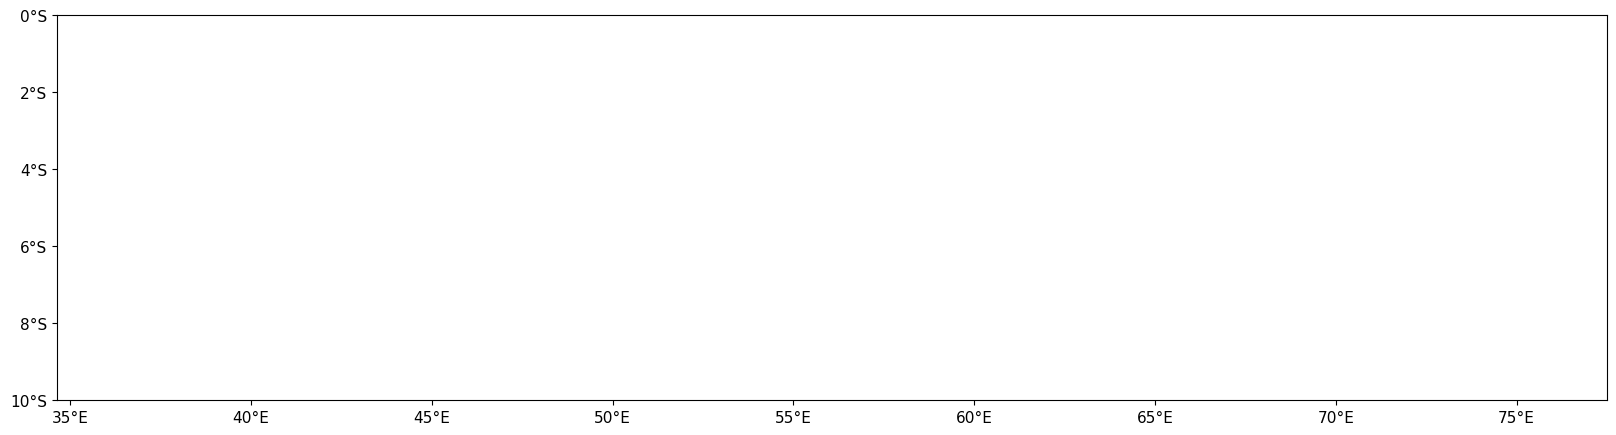

In [4]:
import xarray as xr
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import cmasher as cmr
from scipy.ndimage import gaussian_filter
import matplotlib.colors as mcolors
import cmocean
from matplotlib import colors

array1 = np.load('/home/ocean_personal_data/albinski/pre_work_for_RUNS/ship_data_CROCO/ship_data_all_croco/avg18_22_all_months.npy')
array1 = np.nan_to_num(array1)
percentile_95 = np.nanpercentile(array1, 90)
grid = xr.open_dataset('/home/ocean_personal_data/albinski/croco_grd.nc')
f, ax = plt.subplots(1, 1, figsize=(20,5))

ax.pcolormesh(grid.lon_psi[0, :],
                     grid.lat_psi[:, 0],
                     np.ma.masked_array(np.ones_like(grid.mask_rho[1:-1, 1:-1]),
                                        mask=grid.mask_rho[1:-1, 1:-1]),
                                        cmap=cmr.neutral_r)

#ax.set_aspect('equal')
ax.tick_params(axis='both', which='major', labelsize=11)

plt.ylim(-10,0)

x_ticks = ax.get_xticks()
y_ticks = ax.get_yticks()

y_ticks_labels = [f"{int(abs(tick))}°S" for tick in y_ticks]

x_ticks_labels = [f"{int(tick)}°E" for tick in x_ticks]

ax.set_yticklabels(y_ticks_labels)
ax.set_xticklabels(x_ticks_labels)
#ax.grid(color='grey', linestyle='-', linewidth=0.9, zorder=0)
plt.savefig('domain_map_poster.png', dpi=1000, format='png', bbox_inches='tight')
plt.show()

/tmp/ipykernel_3538038/3523200334.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_ticks_labels)
/tmp/ipykernel_3538038/3523200334.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks_labels)


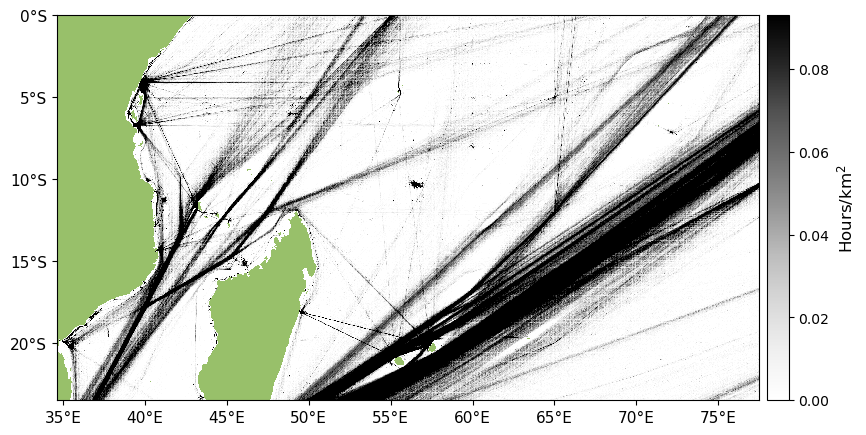

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cmasher as cmr
import cmocean

array1 = np.load('/home/ocean_personal_data/albinski/pre_work_for_RUNS/ship_data_CROCO/tankers+cargo_avg.npy')
array1 = np.nan_to_num(array1)
percentile_95 = np.nanpercentile(array1, 92.5)
grid = xr.open_dataset('/home/ocean_personal_data/albinski/croco_grd.nc')

f, ax = plt.subplots(1, 1, figsize=(10,5))
cmap = ax.pcolormesh(grid.lon_psi[0, :], 
                     grid.lat_psi[:, 0], 
                     array1.T, 
                     cmap='Greys', vmin=0, vmax=percentile_95)
cbar = plt.colorbar(cmap, ax=ax, orientation='vertical', pad=0.01, aspect=17.5, fraction=0.03)
cbar.set_label('Hours/km$^2$', fontsize=12)
cbar.ax.tick_params(labelsize=10)


ax.pcolormesh(grid.lon_psi[0, :],
              grid.lat_psi[:, 0],
              np.ma.masked_array(np.ones_like(grid.mask_rho[1:-1, 1:-1]),
                                 mask=grid.mask_rho[1:-1, 1:-1]),
              cmap=cmr.infinity_s)
ax.set_aspect('equal')
ax.tick_params(axis='both', which='major', labelsize=11)
x_ticks = ax.get_xticks()
y_ticks = ax.get_yticks()

y_ticks_labels = [f"{int(abs(tick))}°S" for tick in y_ticks]
x_ticks_labels = [f"{int(tick)}°E" for tick in x_ticks]

ax.set_yticklabels(y_ticks_labels)
ax.set_xticklabels(x_ticks_labels)

eez_boundaries = gpd.read_file('/home/ocean_personal_data/albinski/eez_masks_json/eez_seychelles.json')

#eez_boundaries.plot(ax=ax, edgecolor='red', linestyle='-', facecolor='none')

plt.savefig('domain_map_with_eez.png', dpi=1000, format='png', bbox_inches='tight')


plt.show()


/home/users/ug20g1/miniconda3/envs/initialenv/lib/python3.11/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


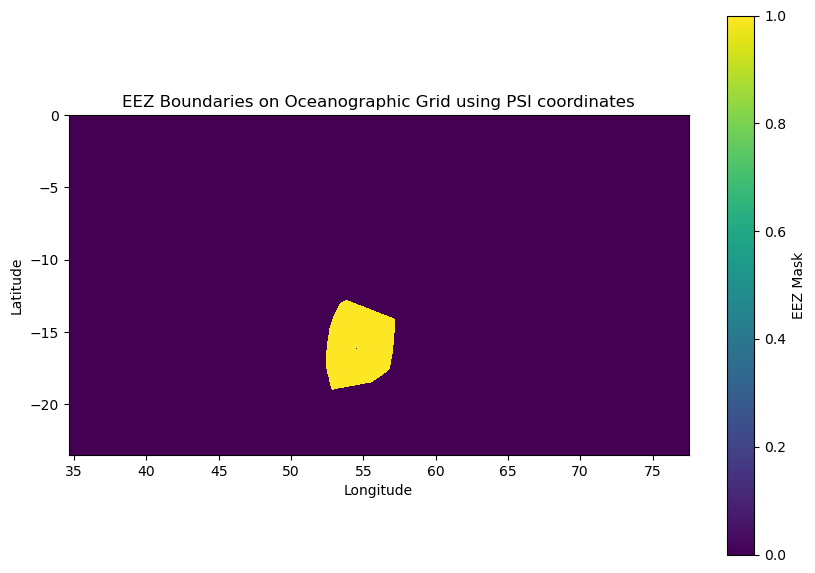

In [17]:
import geopandas as gpd
import numpy as np
import xarray as xr
from rasterio.features import rasterize
from affine import Affine
import matplotlib.pyplot as plt

eez_data = gpd.read_file('/home/ocean_personal_data/albinski/eez_masks_json/eez_tromelin.json') 
grid_data = xr.open_dataset('/home/ocean_personal_data/albinski/croco_grd.nc')

lon_min, lon_max = grid_data.lon_psi.min().item(), grid_data.lon_psi.max().item()
lat_min, lat_max = grid_data.lat_psi.min().item(), grid_data.lat_psi.max().item()
eez_data = eez_data.cx[lon_min:lon_max, lat_min:lat_max]

lon_res = (lon_max - lon_min) / (grid_data.dims['xi_psi'] - 1)
lat_res = (lat_max - lat_min) / (grid_data.dims['eta_psi'] - 1)

transform = Affine.translation(lon_min - lon_res / 2, lat_min - lat_res / 2) * Affine.scale(lon_res, lat_res)
out_shape = (grid_data.dims['eta_psi'], grid_data.dims['xi_psi'])

raster = rasterize(
    shapes=((geom, 1) for geom in eez_data.geometry),
    out_shape=out_shape,
    transform=transform,
    fill=0,
    default_value=1,
    dtype='float32'
)

lon = grid_data.lon_psi[0, :].values
lat = grid_data.lat_psi[:, 0].values
eez_mask = xr.DataArray(
    raster,
    dims=('lat', 'lon'),
    coords={'lat': lat, 'lon': lon},
    name='eez_mask'
)


plt.figure(figsize=(10, 7))
plt.pcolormesh(lon, lat, eez_mask, shading='auto')
plt.colorbar(label='EEZ Mask')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('EEZ Boundaries on Oceanographic Grid using PSI coordinates')
plt.gca().set_aspect('equal')
plt.show()

eez_mask.to_netcdf('/home/ocean_personal_data/albinski/eez_masks_psi/tromelin_eez_mask_psi.nc')




/tmp/ipykernel_1812882/421475267.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_ticks_labels)
/tmp/ipykernel_1812882/421475267.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks_labels)


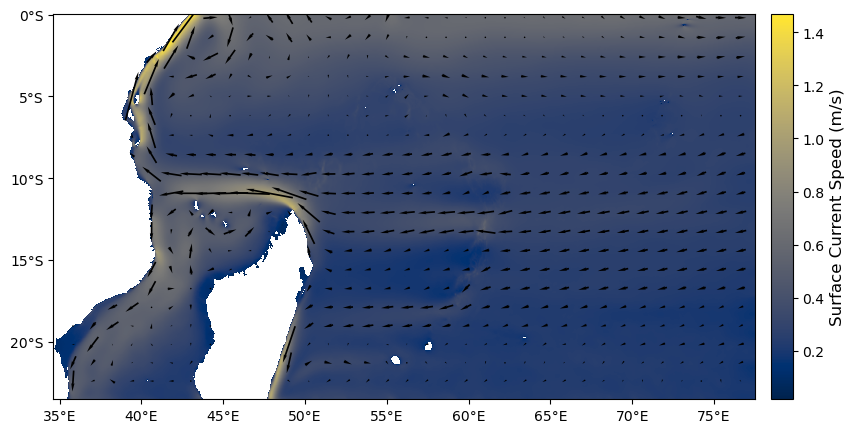

In [6]:
import xarray as xr
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import cmasher as cmr
from scipy.ndimage import gaussian_filter
import matplotlib.colors as mcolors
import cmocean

ds = xr.open_dataset('/home/ocean_personal_data/albinski/WINDS-M_SFC_DAY_MONMEAN_LSM.rho.nc')
array1 = np.load('/home/ocean_personal_data/albinski/pre_work_for_RUNS/ship_data_CROCO/ship_data_all_croco/avg18_22_all_months.npy')
percentile_95 = np.nanpercentile(array1, 90)
grid = xr.open_dataset('/home/ocean_personal_data/albinski/croco_grd.nc')

speed_time_mean = ds['speed'].mean(dim='time_counter')
u_surf_time_mean = ds['u_surf'].mean(dim='time_counter')
v_surf_time_mean = ds['v_surf'].mean(dim='time_counter')

def plot_speed_and_vectors(speed, u_comp, v_comp):
    f, ax = plt.subplots(1, 1, figsize=(20, 5))

    pcm = ax.pcolormesh(speed.nav_lon_rho, speed.nav_lat_rho, speed, cmap = 'cividis', shading='auto')
    
    
    cbar =plt.colorbar(pcm, ax=ax, orientation='vertical', pad=0.01, aspect=17.5, fraction=0.03)
    cbar.set_label('Surface Current Speed (m/s)', fontsize=12)

    #cmap = ax.pcolormesh(grid.lon_psi[0, :], 
    #                 grid.lat_psi[:, 0], 
    #                 array1.T, 
    #                 cmap='Greys', vmin=0, vmax = percentile_95)
    #cbar = plt.colorbar(cmap, ax=ax, orientation='vertical',pad =0.05, aspect=5)
    #cbar.set_label('Hours/km$^2$', fontsize=12)
    #
    #cbar.ax.tick_params(labelsize=10)
    
    ax.pcolormesh(grid.lon_psi[0, :],
                         grid.lat_psi[:, 0],
                         np.ma.masked_array(np.ones_like(grid.mask_rho[1:-1, 1:-1]),
                                            mask=grid.mask_rho[1:-1, 1:-1]),
                                            cmap=cmr.neutral_r)
    ax.set_aspect('equal')
    ax.tick_params(axis='both', which='major', labelsize=10)
    
    x_ticks = ax.get_xticks()
    y_ticks = ax.get_yticks()
    
    y_ticks_labels = [f"{int(abs(tick))}°S" for tick in y_ticks]
    
    x_ticks_labels = [f"{int(tick)}°E" for tick in x_ticks]
    
    ax.set_yticklabels(y_ticks_labels)
    ax.set_xticklabels(x_ticks_labels)
    
    ax.set_aspect('equal')
    
    downsample_factor = 60
    # Use actual longitude and latitude for the quiver plot
    lon = speed.nav_lon_rho[::downsample_factor, ::downsample_factor]
    lat = speed.nav_lat_rho[::downsample_factor, ::downsample_factor]
    u = u_comp[::downsample_factor, ::downsample_factor]
    v = v_comp[::downsample_factor, ::downsample_factor]
    
    ax.quiver(lon, lat, u, v, scale=2, scale_units='inches', color='black', pivot='middle', headwidth=2)
    plt.savefig('domain_map.png', dpi=1000, format='png', bbox_inches='tight')
    plt.show()



plot_speed_and_vectors(speed_time_mean, u_surf_time_mean, v_surf_time_mean)

## Averaging the shipping data for each month individually across a number of years

In [1]:
import numpy as np
import os
from tqdm import tqdm
months = range(1,13)
all_data = []
for month in months:
    array1 = np.load(f'/home/ocean_personal_data/albinski/pre_work_for_RUNS/ship_data_CROCO/fishing+others/{month}_avg.npy')
    array1 = np.nan_to_num(array1)

    all_data.append(array1)

average_array_nanmean = np.mean(all_data, axis=0)
    
np.save(f'/home/ocean_personal_data/albinski/pre_work_for_RUNS/ship_data_CROCO/fishing+others_avg.npy', average_array_nanmean)